# Import

In [365]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
rootpath = "~/OneDrive/Desktop/Programming/DS/datasets/house_prices_advanced_regression_techniques"
train = pd.read_csv(rootpath + "/train.csv")
test = pd.read_csv(rootpath + "/test.csv")
sample_submission = pd.read_csv(rootpath + "/sample_submission.csv")

# EDA

In [367]:
df = pd.concat([train, test])

In [368]:
df = df.set_index('Id')

In [369]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [370]:
pd.set_option('display.max_columns', None)

### Choice best features

In [371]:
pd.set_option('display.max_rows', None)
matrix = df.corr().abs()
matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [372]:
df = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'PoolQC', 
         'FullBath', 'Alley', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 
         'Fireplaces', 'Foundation', 'HeatingQC', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 
         'SalePrice']]

In [373]:
cleanup_nums = {"Foundation": {"PConc": 1, "CBlock": 2, "BrkTil": 3, "Wood": 4, "Slab": 5, "Stone": 6},
                "HeatingQC":  {"Ex": 1, "Gd": 2, "TA": 3, "Fa": 4, "Po": 5}}
              
df = df.replace(cleanup_nums)

In [374]:
df.skew().sort_values(ascending=False)

MasVnrArea      2.602589
OpenPorchSF     2.536417
SalePrice       1.882876
WoodDeckSF      1.843380
Foundation      1.642338
LotFrontage     1.503278
1stFlrSF        1.470360
BsmtFinSF1      1.425722
GrLivArea       1.270010
TotalBsmtSF     1.162882
TotRmsAbvGrd    0.758757
Fireplaces      0.733872
HeatingQC       0.550192
GarageArea      0.241301
OverallQual     0.197212
FullBath        0.167692
GarageCars     -0.218373
GarageYrBlt    -0.382150
YearRemodAdd   -0.451252
YearBuilt      -0.600114
dtype: float64

In [375]:
df.isna().sum()

OverallQual        0
GrLivArea          0
GarageCars         1
GarageArea         1
TotalBsmtSF        1
1stFlrSF           0
PoolQC          2909
FullBath           0
Alley           2721
TotRmsAbvGrd       0
YearBuilt          0
YearRemodAdd       0
GarageYrBlt      159
MasVnrArea        23
Fireplaces         0
Foundation         0
HeatingQC          0
BsmtFinSF1         1
LotFrontage      486
WoodDeckSF         0
OpenPorchSF        0
SalePrice       1459
dtype: int64

In [376]:
df = df.drop(['PoolQC', 'Alley'], axis=1)

In [377]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)
df['GarageCars'].fillna(df['GarageCars'].median(), inplace=True)
df['GarageArea'].fillna(df['GarageArea'].median(), inplace=True)
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median(), inplace=True)

In [378]:
median_lot = df['LotFrontage'].median()
std_lot = df['LotFrontage'].std()
df['LotFrontage'].fillna(np.random.randint(median_lot - std_lot, median_lot + std_lot), inplace=True)

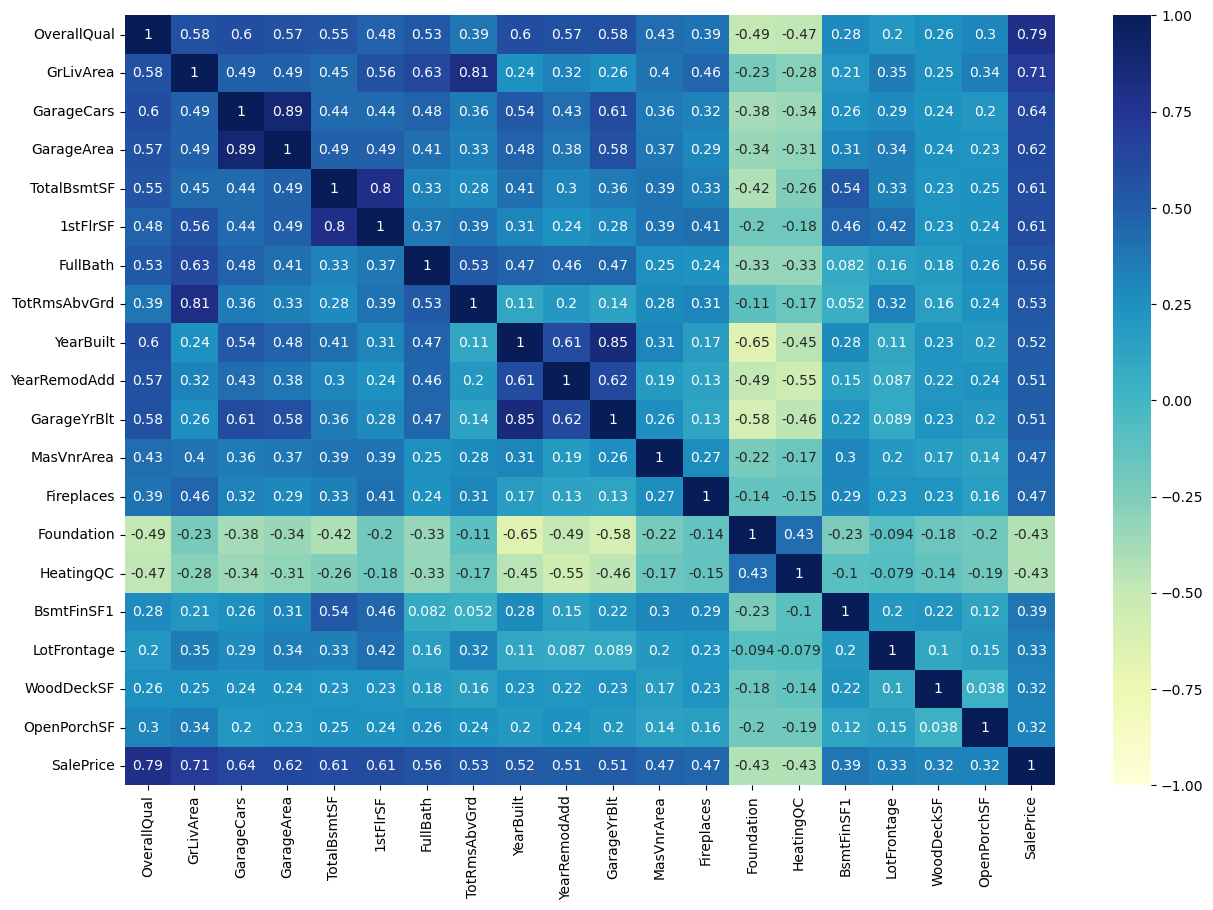

In [379]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='YlGnBu', xticklabels=df.columns.values, yticklabels=df.columns.values, 
            annot=True, vmin=-1, vmax=1)
plt.show()

In [380]:
df = df.drop(['GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt', '1stFlrSF'], axis=1)

In [381]:
df = pd.get_dummies(df)

In [382]:
train = df.iloc[:1460,:]
X_train = train.drop(['SalePrice'], axis=1)
y_train = train.SalePrice.values

test = df.iloc[1460:,:]
X_test = test.drop(['SalePrice'], axis=1)

# Model

In [383]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [384]:
alphas = np.linspace(0.01,100,500)
lasso = Lasso(max_iter=1000000)
coefs = []

In [385]:
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

In [386]:
model = LassoCV(cv=5, random_state=0, max_iter=1000000)

In [389]:
model.fit(X_train, y_train)
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=51659.74462051519)

In [390]:
pred = lasso_best.predict(X_test)

# Export

In [391]:
df_submit = pd.DataFrame({'Id': test.index,
                          'SalePrice': pred})

In [392]:
df_submit.to_csv(rootpath + "/submission.csv", index=False)